In [1]:
using Pkg
(dirname(Pkg.project().path) == @__DIR__) || Pkg.activate(@__DIR__)
using Crystalline
using BandGraphs
using Graphs
using SymmetryBases
using GraphMakie
using MetaGraphsNext
using KdotP
using GLMakie
Makie.inline!(true) # make GLMakie work for notebooks

true

## Settings with symmetry-protected Weyl points

### No subgroup relations
- ⋕24 (W₁, WA₁): Impossible
- ⋕150 (KA₃, K₃, H₃, HA₃): Technically possible with fine-tuning of K₃, KA₃, H₃, & HA₃ irrep frequencies in `sb[7]`. Otherwise impossible.
- ⋕152 (KA₃, K₃, H₃, HA₃)
- ⋕154 (KA₃, K₃, H₃, HA₃)
- ⋕168 (K₂K₃, H₂H₃): Technically possible with fine-tuning of K₂K₃ & H₂H₃ irrep frequencies. Otherwise impossible.
- ⋕169 (K₂K₃, H₁H₃)
- ⋕170 (K₂K₃, H₂H₃)
- ⋕171 (K₂K₃, H₂H₃): Impossible (e.g., always intersects some 2-fold non-Weyl degeneracy at A)
- ⋕172 (K₂K₃, H₁H₃)
- ⋕173 (K₂K₃, H₂H₃)

### Has subgroup relations
- ⋕98 (P₁) 
  - ⋕24
- ⋕177 (K₃, H₃) 
  - ⋕150, ⋕168
- ⋕178 (K₃) 
  - ⋕152, ⋕169
- ⋕179 (K₃) 
  - ⋕154, ⋕170
- ⋕180 (K₃, H₃) 
  - ⋕154, ⋕171
- ⋕181 (K₃, H₃) 
  - ⋕152, ⋕172
- ⋕182 (K₃) 
  - ⋕173, ⋕150
- ⋕199 (P₁, P₂, P₃, PA₁, PA₂, PA₃) 
  - ⋕24
- ⋕210 (W₁) 
  - ⋕24, ⋕98 
- ⋕214 (P₁, P₂, P₃) 
  - ⋕24, ⋕98, ⋕199 

## Functionality for plotting band graph permutations

In [2]:
function plot_irrep_filtered_bandgraphs(sgnum, selected_irlabs; timereversal=true, maxplot=Inf)
    lgirsd = lgirreps(sgnum)
    timereversal && (lgirsd = Dict(klab=>realify(lgirs) for (klab, lgirs) in lgirsd))
    subts = subduction_tables(sgnum; timereversal)
    sb, brs = compatibility_basis(sgnum)

    nplots = 0
    for idx in 1:length(sb)
        _n = sb[idx];
        n = SymVector(_n, sb.irlabs, lgirsd);
        any(irlab -> contains(string(n), irlab), selected_irlabs) || continue

        bandg = build_subgraphs(n, subts, lgirsd);
        subgraphs_ps = permute_subgraphs(bandg.subgraphs);
        bandgp = BandGraphs.BandGraphPermutations(bandg.partitions, subgraphs_ps);
        for p in 1:length(bandgp)
            faxp, _ = plot_flattened_bandgraph(bandgp[p])
            faxp.axis.title = "⋕$sgnum: vector $idx (permutation $p/$(length(bandgp)))" 
            display(faxp.figure)
            nplots += 1
            nplots ≥ maxplot && return
        end
    end
end

plot_irrep_filtered_bandgraphs (generic function with 1 method)

## Reference points

### Without subgroup relations

#### Space group 24
It is impossible to have frequency isolated Weyl points in space group 24, even if W₁ and WA₁ are assumed identical, cf. the following figures:

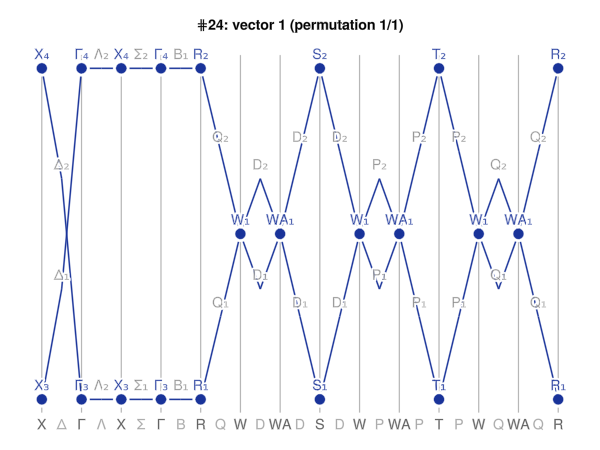

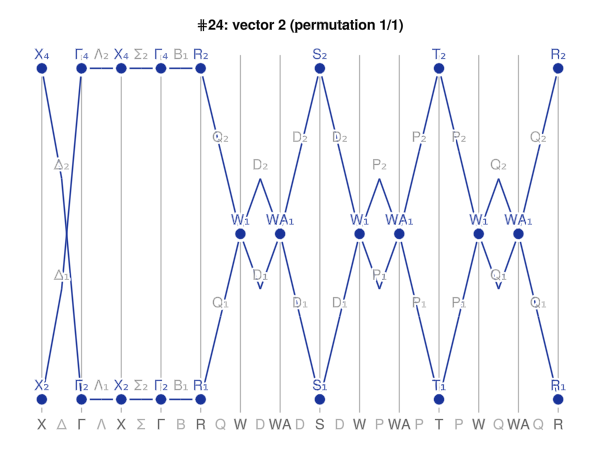

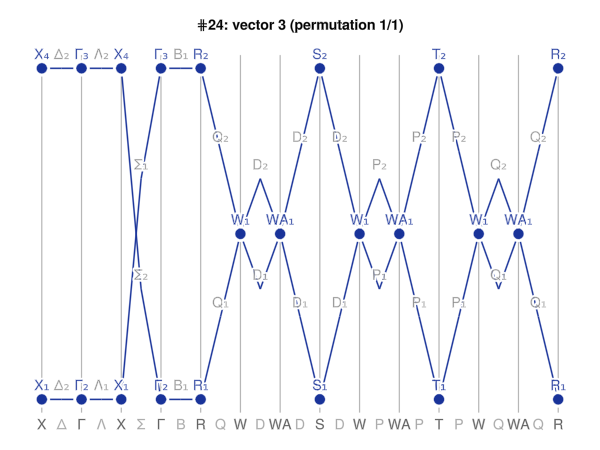

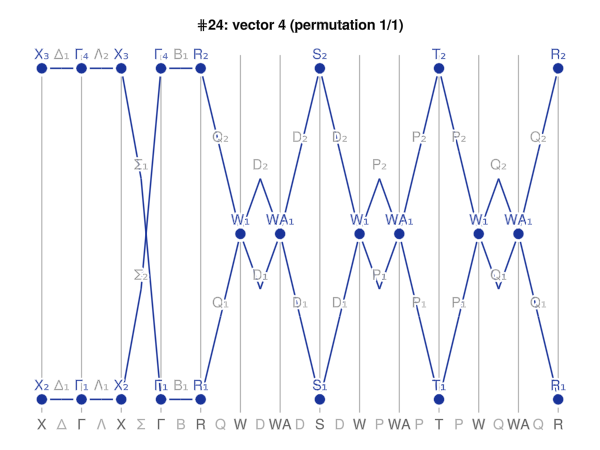

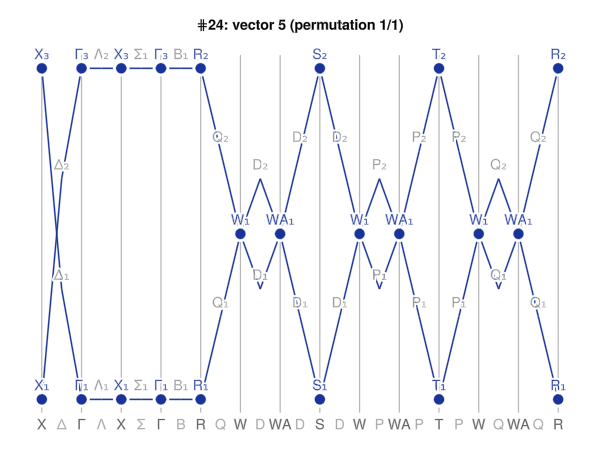

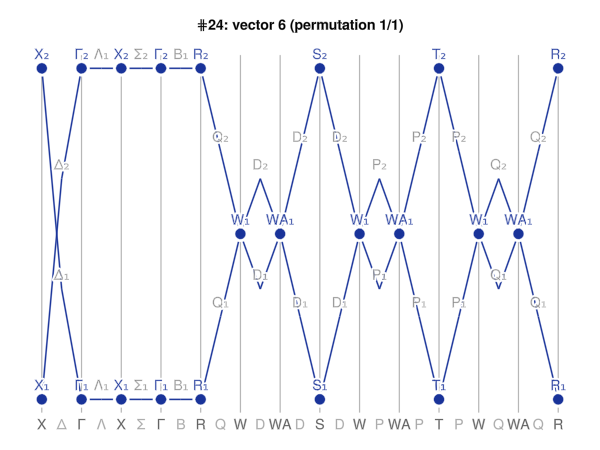

In [3]:
plot_irrep_filtered_bandgraphs(24, ["W₁", "WA₁"]; timereversal=true)

#### Space group 150

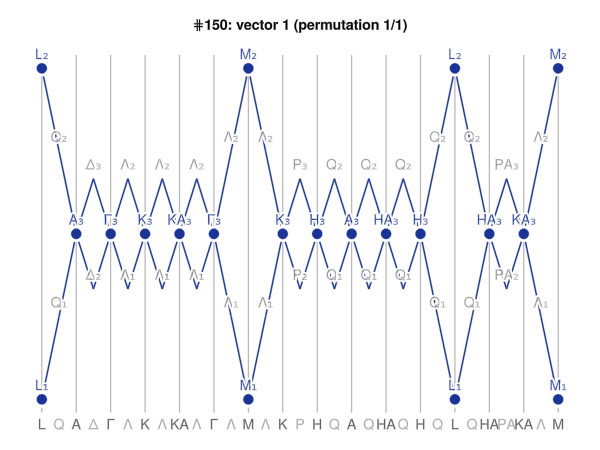

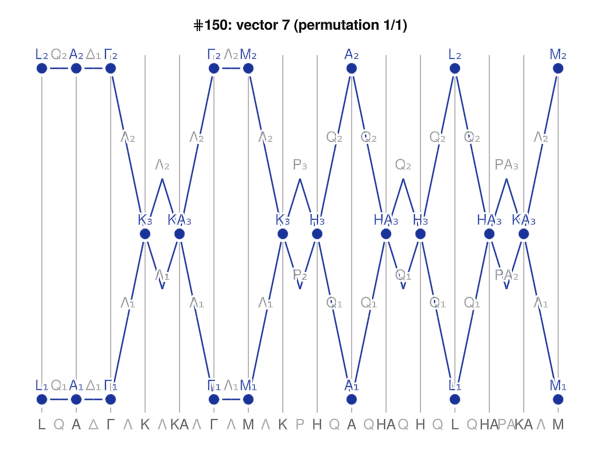

In [4]:
plot_irrep_filtered_bandgraphs(150, ["KA₃", "K₃", "H₃", "HA₃"]; timereversal=true)

#### Space group 168

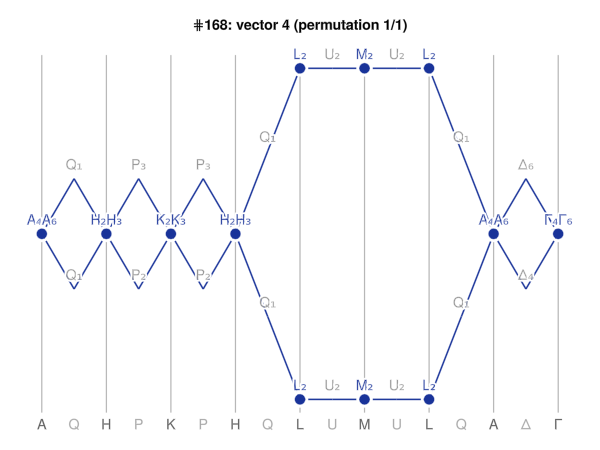

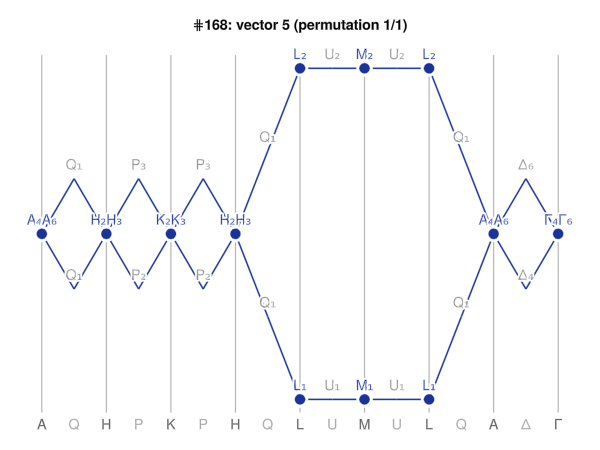

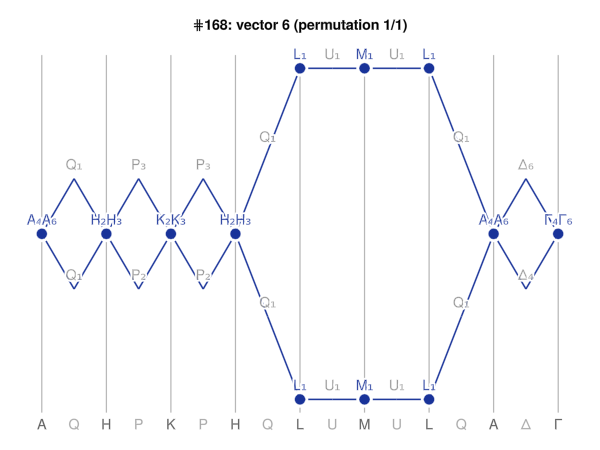

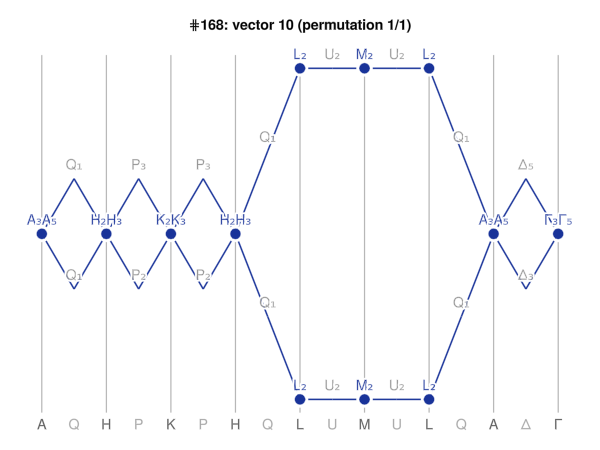

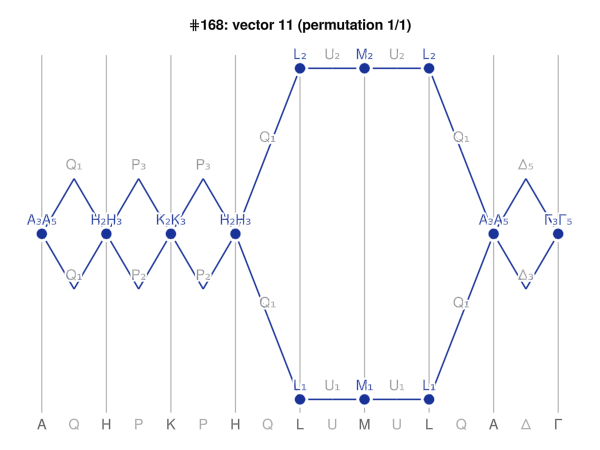

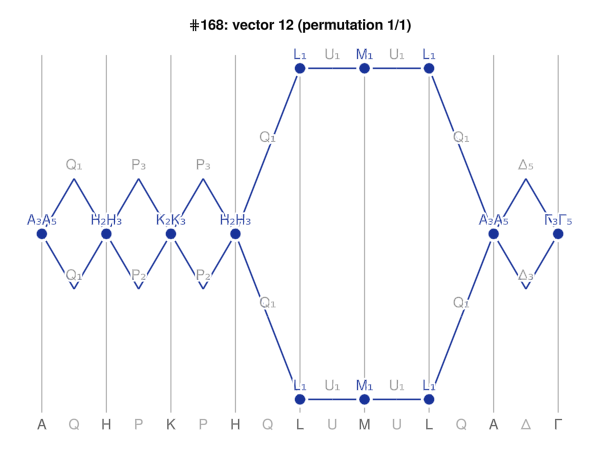

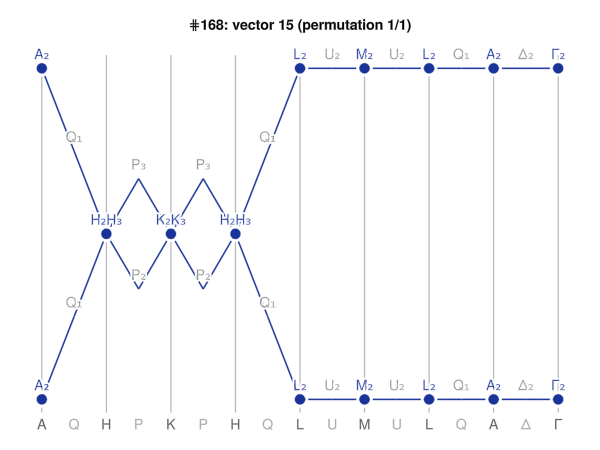

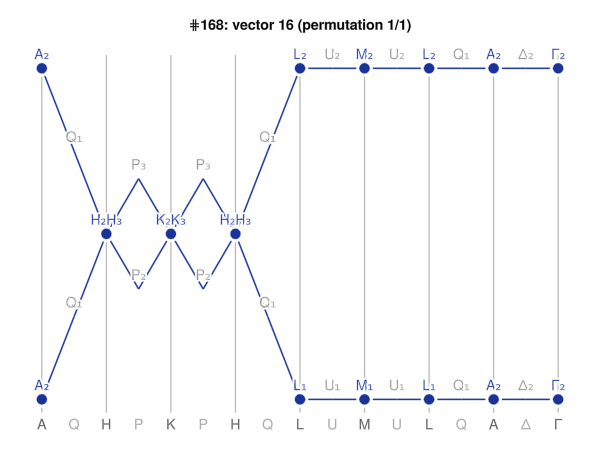

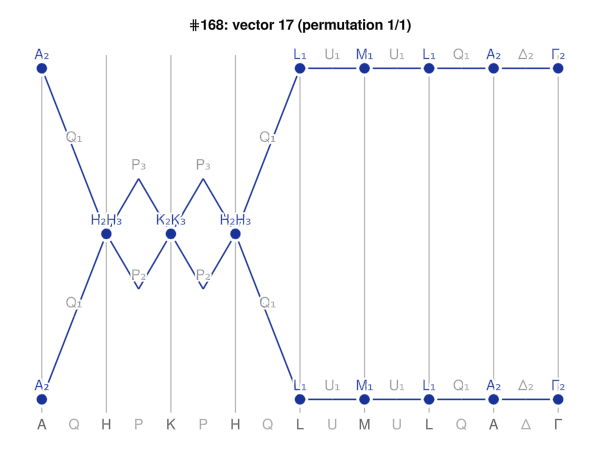

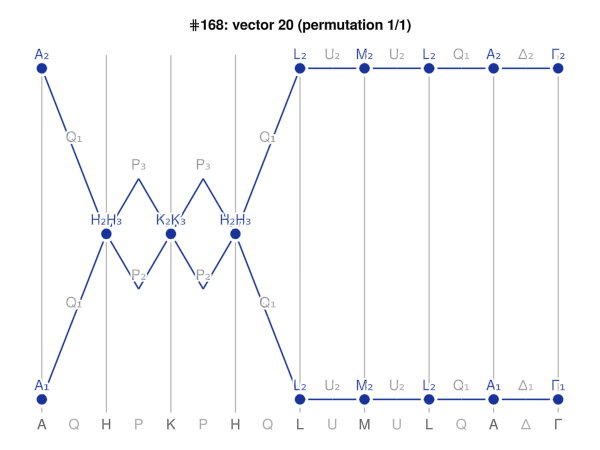

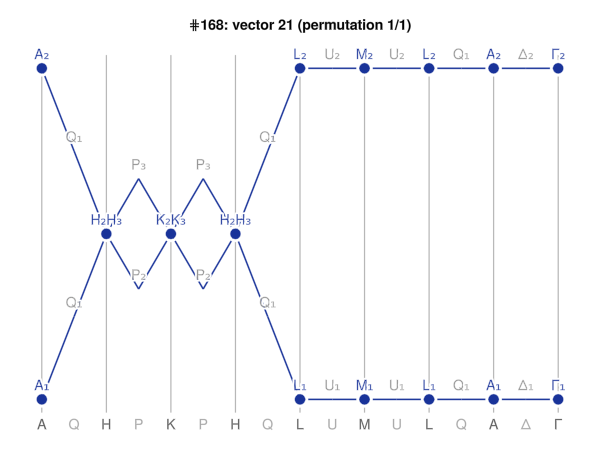

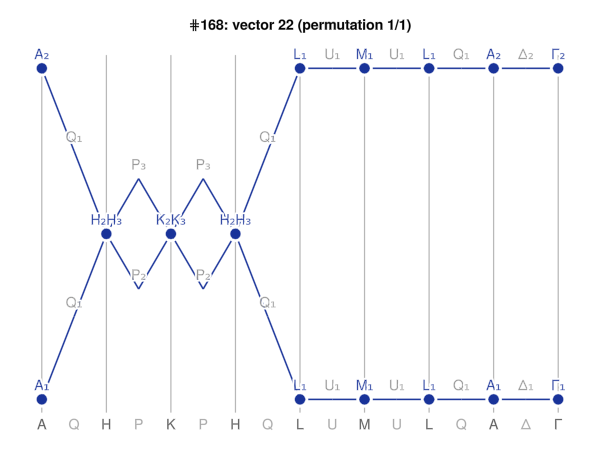

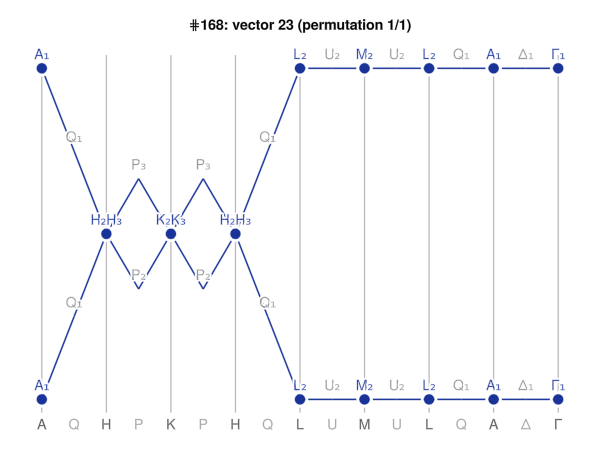

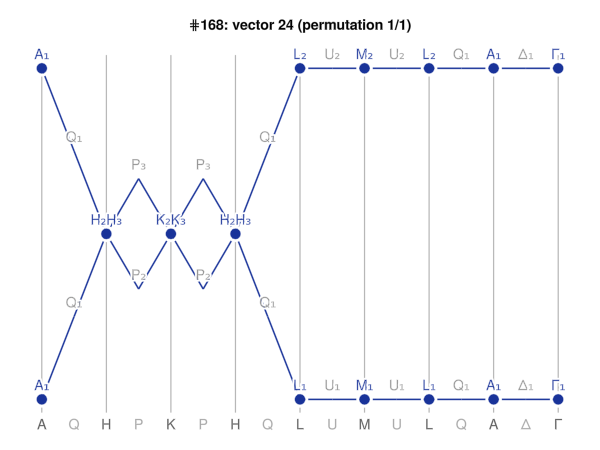

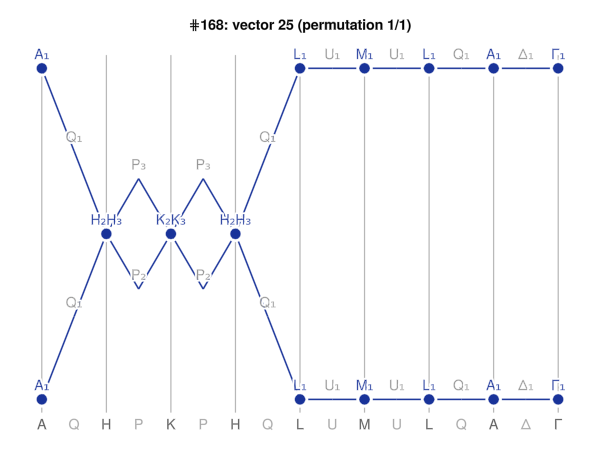

In [5]:
plot_irrep_filtered_bandgraphs(168, ["K₂K₃", "H₂H₃"]; timereversal=true)

#### Space group 171

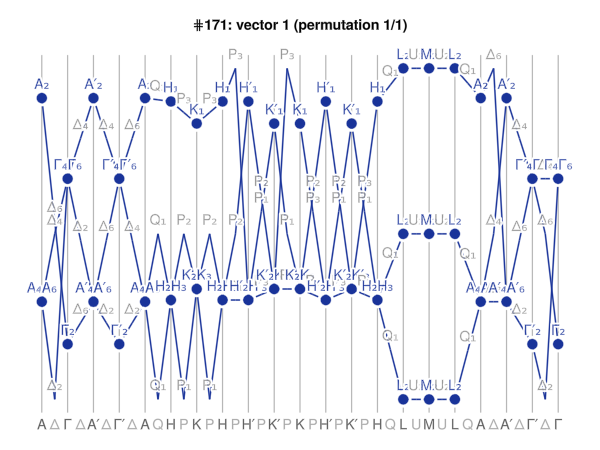

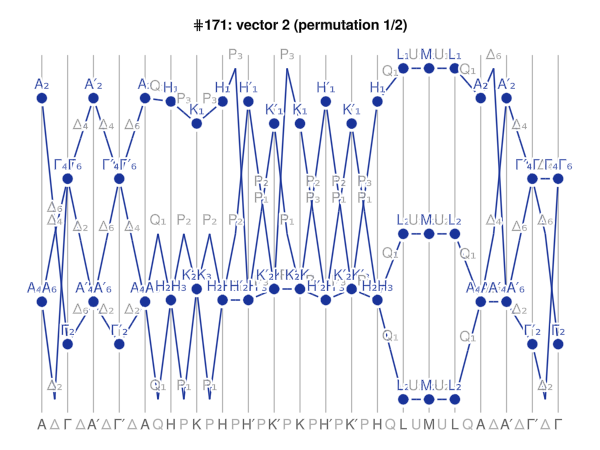

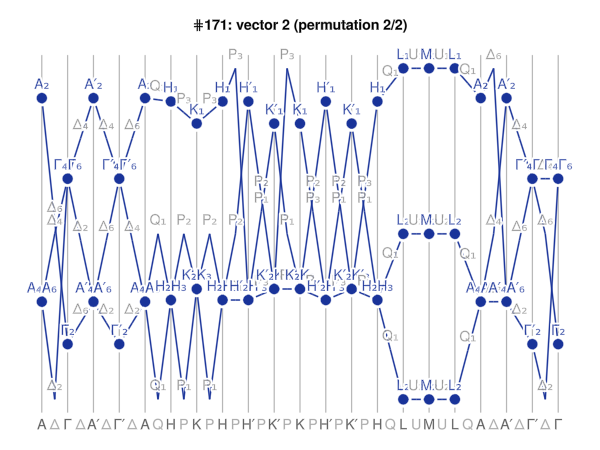

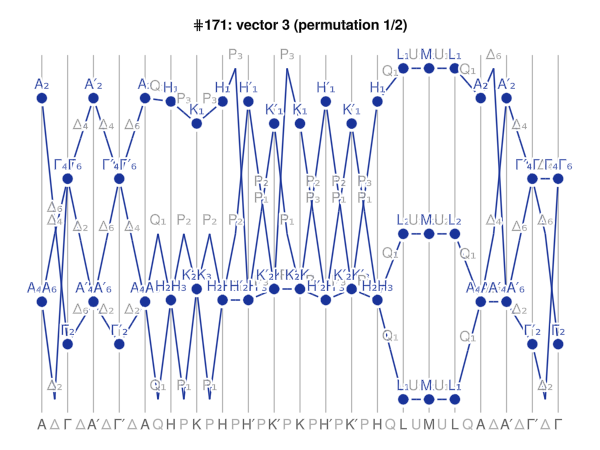

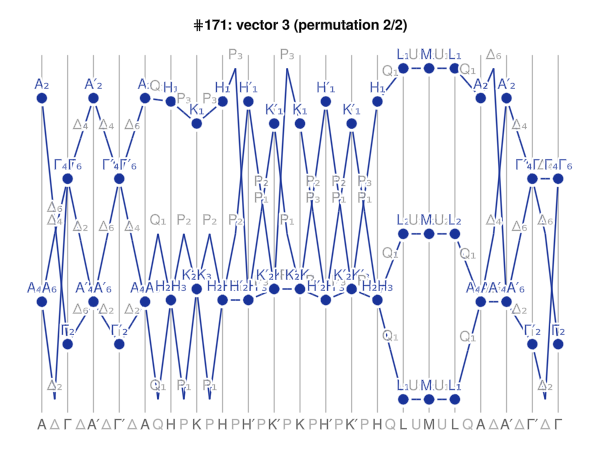

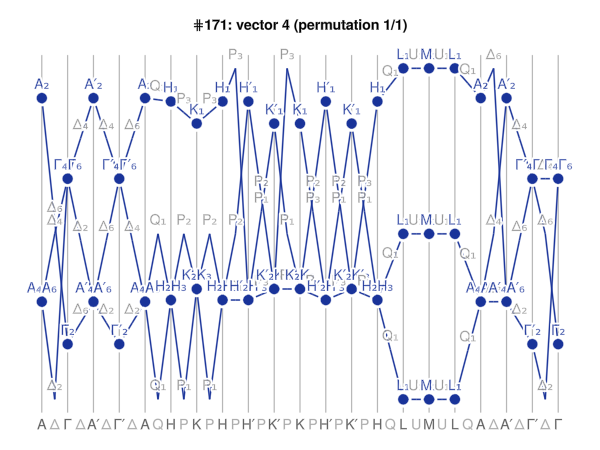

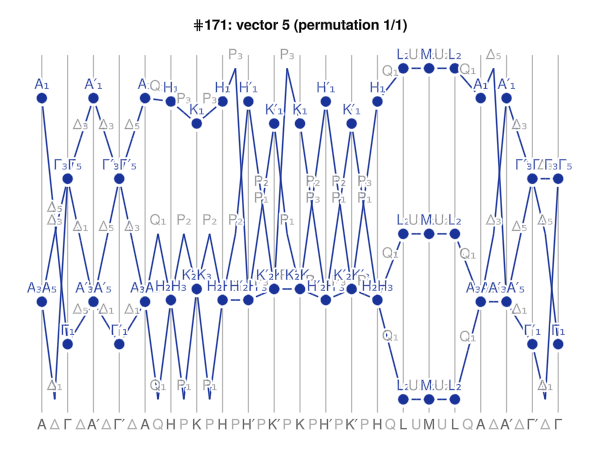

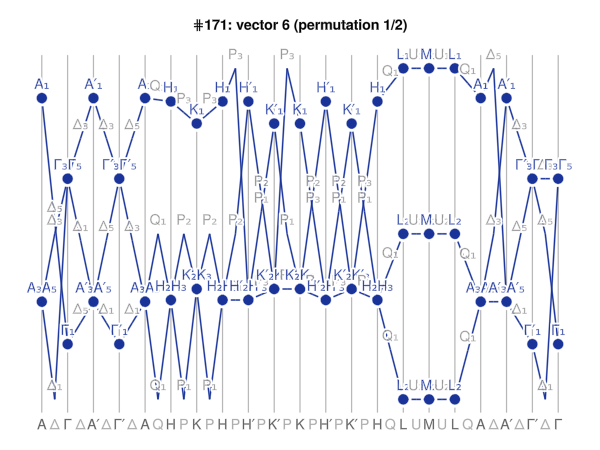

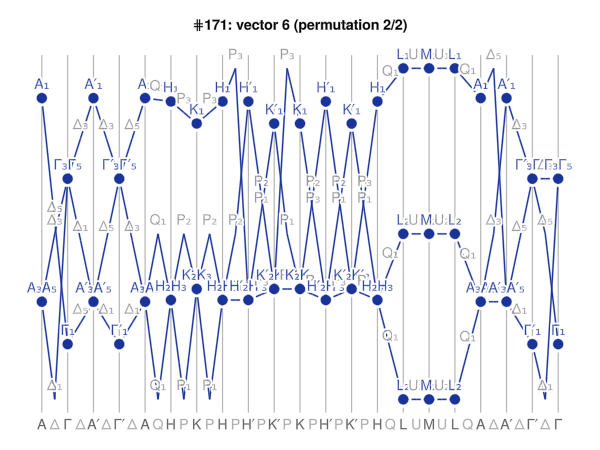

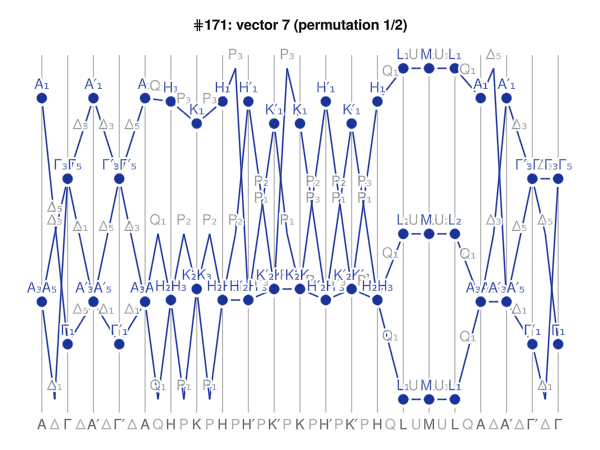

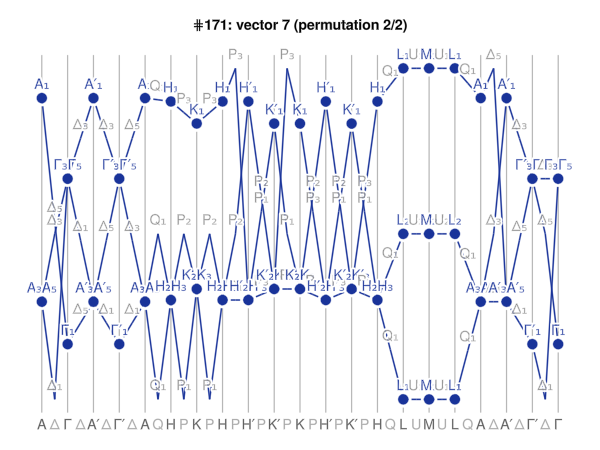

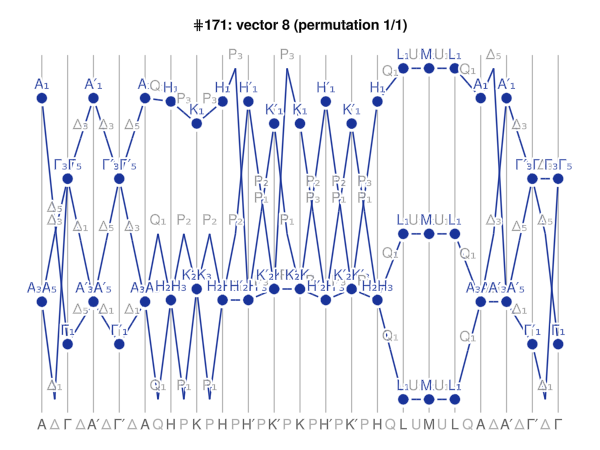

In [6]:
plot_irrep_filtered_bandgraphs(171, ["K₂K₃", "H₂H₃"]; timereversal=true)

### With subgroup relations

#### Space group 177

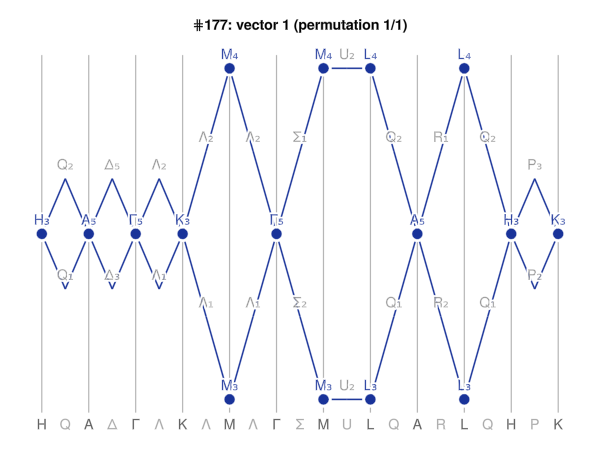

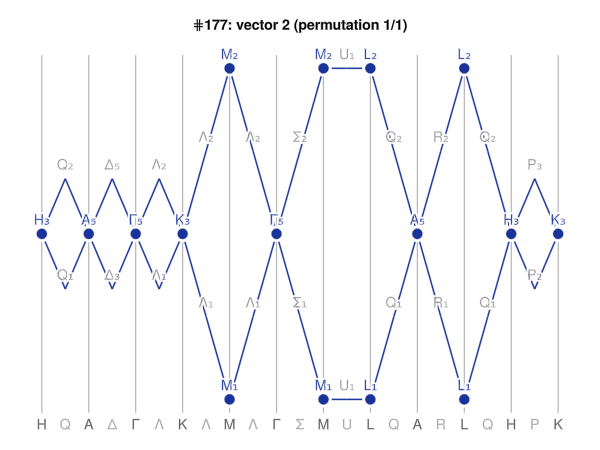

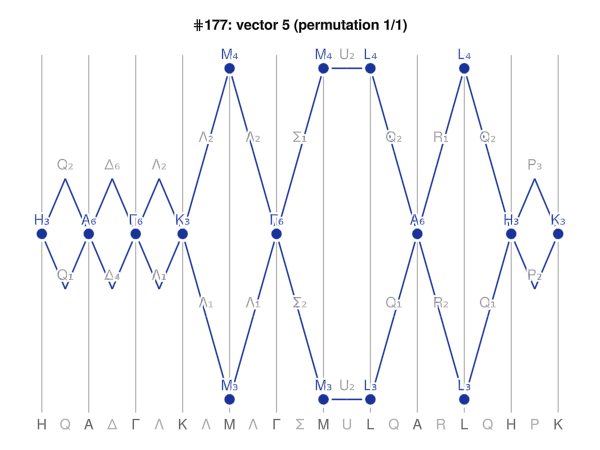

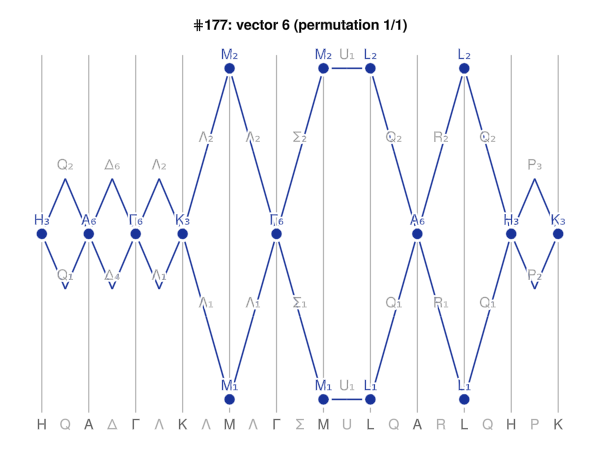

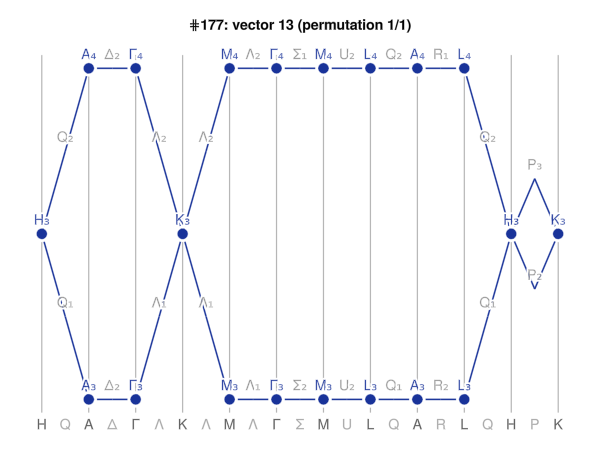

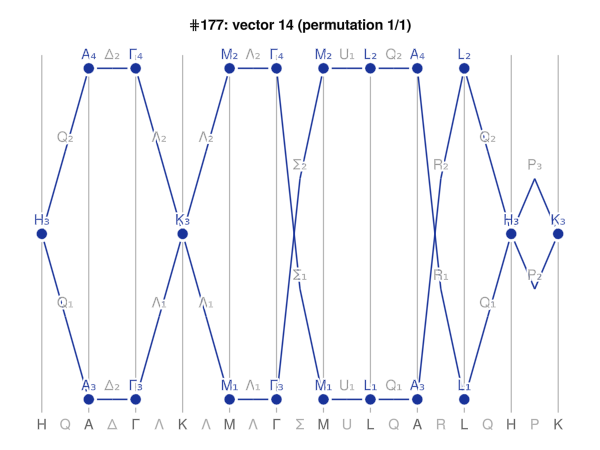

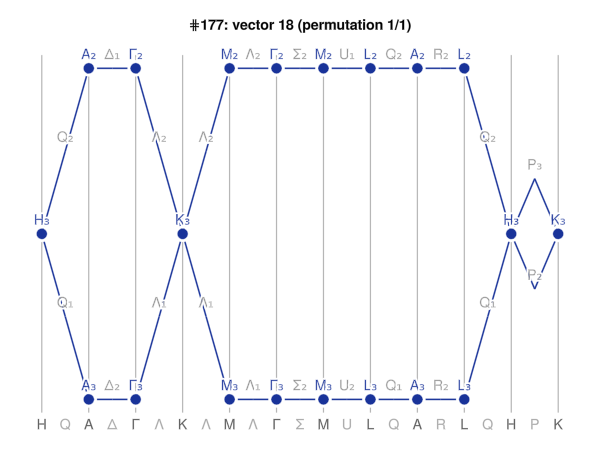

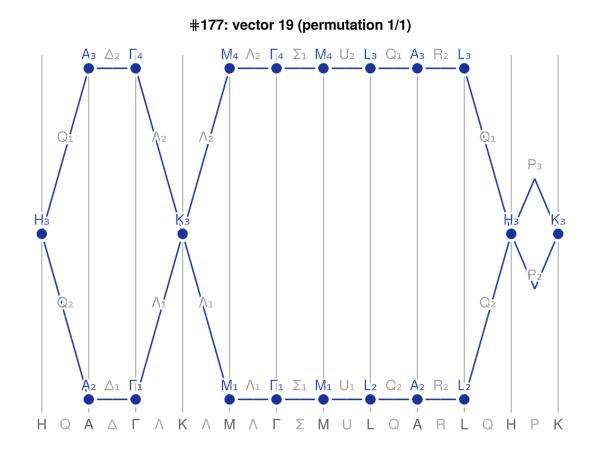

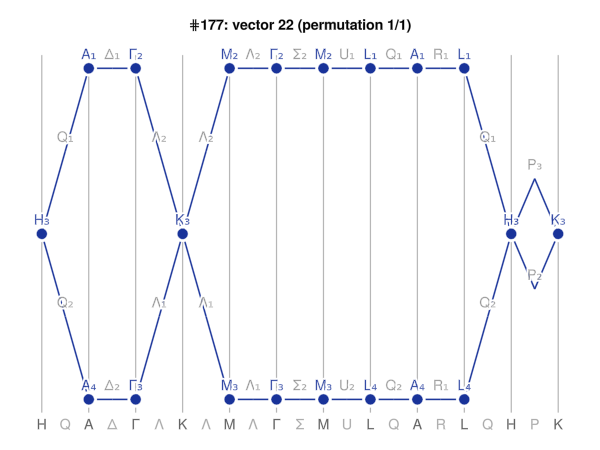

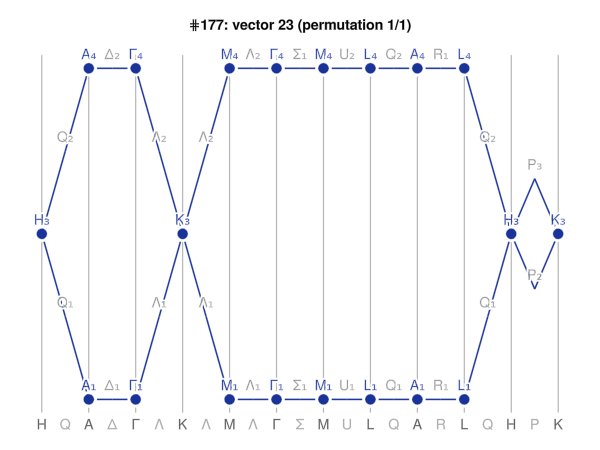

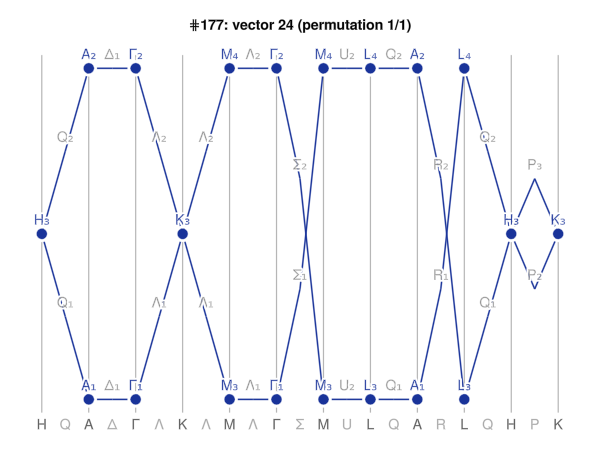

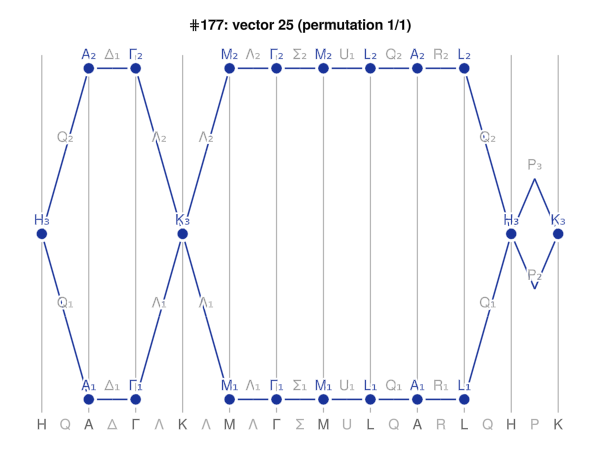

In [9]:
plot_irrep_filtered_bandgraphs(177, ["K₃", "H₃"]; timereversal=true)